In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import matplotlib.pyplot as plt

# Informasi Dataset

In [6]:
df = pd.read_csv('../dataset_final/final_dataset.csv')
df = df.drop(['Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR'], axis=1)
df

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,60894,8419.0,Reduxx,Boos,jett,313.0,31.0,4.0,4.0,0.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,466.0,ChurmZ,Boos,chamber,227.0,16.0,1.0,1.0,0.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,3712.0,diaamond,Boos,sova,226.0,27.0,3.0,0.0,3.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,5099.0,Boltzy,Boos,viper,218.0,19.0,3.0,0.0,3.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,3983.0,Virtyy,Boos,skye,80.0,22.0,3.0,1.0,2.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108245,2309,2181.0,QUERNI,GRG,omen,227.0,18.0,1.0,0.0,1.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0
108246,2309,2179.0,bmblbe,GRG,phoenix,110.0,33.0,0.0,2.0,-2.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0
108247,2309,2178.0,DcTzR,GRG,jett,98.0,13.0,1.0,7.0,-6.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0
108248,2309,2180.0,FRESHY,GRG,sova,91.0,19.0,0.0,1.0,-1.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108250 entries, 0 to 108249
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GameID             108250 non-null  int64  
 1   PlayerID           108250 non-null  float64
 2   PlayerName         108250 non-null  object 
 3   TeamAbbreviation   108250 non-null  object 
 4   Agent              108250 non-null  object 
 5   ACS                108250 non-null  float64
 6   HS_Percent         108250 non-null  float64
 7   FirstKills         108250 non-null  float64
 8   FirstDeaths        108250 non-null  float64
 9   FKFD_PlusMinus     108250 non-null  float64
 10  Num_2Ks            108250 non-null  float64
 11  Num_3Ks            108250 non-null  float64
 12  Num_4Ks            108250 non-null  float64
 13  Num_5Ks            108250 non-null  float64
 14  OnevOne            108250 non-null  float64
 15  OnevTwo            108250 non-null  float64
 16  On

# Feature Engineering

Kita lakukan feature engineering terlebih dahulu karena kita ingin fokus pada atribut-atribut dari sebuah tim dalam sebuah game.

- usesAgentX (X itu diisi encoding agent): 0/1
- average atau total ACS, HS_Percent, FirstKills, FirstDeaths, etc (baik total maupun average tidak masalah karena sama2 dibagi 5 berhubung tiap tim playernya ada 5)
- isWin
- Map, ThisMapScore, EnemyMapScore
- ThisEco, ThisSemiEco ... EnemyEco, ...

Sedangkan untuk Identifier, kita gunakan MatchID dan GameID

In [8]:
df_scores = pd.read_csv('../dataset_final/scores_final.csv')
df_scores = df_scores.drop(['Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR'], axis=1)
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108250 entries, 0 to 108249
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GameID            108250 non-null  int64  
 1   PlayerID          108250 non-null  float64
 2   PlayerName        108250 non-null  object 
 3   TeamAbbreviation  108250 non-null  object 
 4   Agent             108250 non-null  object 
 5   ACS               108250 non-null  float64
 6   HS_Percent        108250 non-null  float64
 7   FirstKills        108250 non-null  float64
 8   FirstDeaths       108250 non-null  float64
 9   FKFD_PlusMinus    108250 non-null  float64
 10  Num_2Ks           108250 non-null  float64
 11  Num_3Ks           108250 non-null  float64
 12  Num_4Ks           108250 non-null  float64
 13  Num_5Ks           108250 non-null  float64
 14  OnevOne           108250 non-null  float64
 15  OnevTwo           108250 non-null  float64
 16  OnevThree         10

### Encoding terhadap Agent

In [9]:
agent_encoding = pd.read_csv('../dataset/agent_encode.csv')
agent_encoder = agent_encoding[['Agent', 'Encode']].set_index('Agent')['Encode'].to_dict()

In [10]:
df_scores['Agent'] = df_scores['Agent'].map(agent_encoder)

In [11]:
df_scores

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,8419.0,Reduxx,Boos,0,313.0,31.0,4.0,4.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,466.0,ChurmZ,Boos,10,227.0,16.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,3712.0,diaamond,Boos,1,226.0,27.0,3.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,5099.0,Boltzy,Boos,7,218.0,19.0,3.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,3983.0,Virtyy,Boos,5,80.0,22.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108245,2309,2181.0,QUERNI,GRG,13,227.0,18.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0
108246,2309,2179.0,bmblbe,GRG,15,110.0,33.0,0.0,2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,2.0
108247,2309,2178.0,DcTzR,GRG,0,98.0,13.0,1.0,7.0,-6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
108248,2309,2180.0,FRESHY,GRG,1,91.0,19.0,0.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1.0,0.0


In [12]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108250 entries, 0 to 108249
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GameID            108250 non-null  int64  
 1   PlayerID          108250 non-null  float64
 2   PlayerName        108250 non-null  object 
 3   TeamAbbreviation  108250 non-null  object 
 4   Agent             108250 non-null  int64  
 5   ACS               108250 non-null  float64
 6   HS_Percent        108250 non-null  float64
 7   FirstKills        108250 non-null  float64
 8   FirstDeaths       108250 non-null  float64
 9   FKFD_PlusMinus    108250 non-null  float64
 10  Num_2Ks           108250 non-null  float64
 11  Num_3Ks           108250 non-null  float64
 12  Num_4Ks           108250 non-null  float64
 13  Num_5Ks           108250 non-null  float64
 14  OnevOne           108250 non-null  float64
 15  OnevTwo           108250 non-null  float64
 16  OnevThree         10

### Scores by GameID

In [13]:
df_scores_by_game = [
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1), 
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1), 
]
df_scores_by_game[0]

,GameID
0,60894
1,60895
2,60896
3,60888
4,60889
...,...
10820,2238
10821,2297
10822,2244
10823,2302


#### The Use of Agents (`useAgentX`)

In [14]:
df_scores_team = [df_scores[df_scores.index % 10 < 5], df_scores[df_scores.index % 10 >= 5]]

In [15]:
df_scores_team[0]

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,8419.0,Reduxx,Boos,0,313.0,31.0,4.0,4.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,466.0,ChurmZ,Boos,10,227.0,16.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,3712.0,diaamond,Boos,1,226.0,27.0,3.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,5099.0,Boltzy,Boos,7,218.0,19.0,3.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,3983.0,Virtyy,Boos,5,80.0,22.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108240,2309,2104.0,ZIGITARES,IB,0,336.0,10.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,1.0,0.0
108241,2309,2106.0,LehtitienLetanki,IB,1,225.0,36.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,2.0,0.0
108242,2309,2105.0,Kevyt,IB,13,224.0,17.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,5.0,0.0
108243,2309,1168.0,Miikasd,IB,6,199.0,31.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,1.0


In [16]:
(df_scores_team[0]['Agent'] == 0).astype(int)

0         1
1         0
2         0
3         0
4         0
         ..
108240    1
108241    0
108242    0
108243    0
108244    0
Name: Agent, Length: 54125, dtype: int32

In [17]:
NUMBER_OF_AGENTS = 17
NUMBER_OF_ROWS = len(df_scores_team[0])

for team in range(1,3):
    for agent in range(NUMBER_OF_AGENTS):
        df_scores_team[team-1]['agentUse{}'.format(agent)] = (df_scores_team[team-1]['Agent'] == agent).astype(int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14920\502684348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores_team[team-1]['agentUse{}'.format(agent)] = (df_scores_team[team-1]['Agent'] == agent).astype(int)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14920\502684348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores_team[team-1]['agentUse{}'.format(agent)] = (df_scores_team[team-1]['Agent'] == agent).astype(int)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14920\502684348.py:6: SettingWi

In [18]:
df_scores_team[0].head(10)

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,agentUse7,agentUse8,agentUse9,agentUse10,agentUse11,agentUse12,agentUse13,agentUse14,agentUse15,agentUse16
0,60894,8419.0,Reduxx,Boos,0,313.0,31.0,4.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,60894,466.0,ChurmZ,Boos,10,227.0,16.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,60894,3712.0,diaamond,Boos,1,226.0,27.0,3.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,60894,5099.0,Boltzy,Boos,7,218.0,19.0,3.0,0.0,3.0,...,1,0,0,0,0,0,0,0,0,0
4,60894,3983.0,Virtyy,Boos,5,80.0,22.0,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
10,60895,3712.0,diaamond,Boos,1,221.0,31.0,0.0,2.0,-2.0,...,0,0,0,0,0,0,0,0,0,0
11,60895,3983.0,Virtyy,Boos,11,169.0,16.0,4.0,1.0,3.0,...,0,0,0,0,1,0,0,0,0,0
12,60895,5099.0,Boltzy,Boos,2,149.0,41.0,1.0,2.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
13,60895,466.0,ChurmZ,Boos,10,148.0,23.0,0.0,1.0,-1.0,...,0,0,0,1,0,0,0,0,0,0
14,60895,8419.0,Reduxx,Boos,5,94.0,33.0,0.0,4.0,-4.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
agent_use_columns = ['agentUse{}'.format(i) for i in range(NUMBER_OF_AGENTS)]
df_agent_uses = [df_scores_team[0][['GameID'] + agent_use_columns], df_scores_team[1][['GameID'] + agent_use_columns]]

In [20]:
df_agent_uses_final = [
    df_agent_uses[0].groupby('GameID').sum().reset_index(),
    df_agent_uses[1].groupby('GameID').sum().reset_index(),
]
df_agent_uses_final[0]

,GameID,agentUse0,agentUse1,agentUse2,agentUse3,agentUse4,agentUse5,agentUse6,agentUse7,agentUse8,agentUse9,agentUse10,agentUse11,agentUse12,agentUse13,agentUse14,agentUse15,agentUse16
0,2238,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,2241,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
2,2244,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
3,2297,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,2302,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,60904,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
10821,60912,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
10822,60913,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
10823,60921,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [21]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_agent_uses_final[0], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].merge(df_agent_uses_final[1], left_on='GameID', right_on='GameID')

In [22]:
df_scores_by_game[0]

,GameID,agentUse0,agentUse1,agentUse2,agentUse3,agentUse4,agentUse5,agentUse6,agentUse7,agentUse8,agentUse9,agentUse10,agentUse11,agentUse12,agentUse13,agentUse14,agentUse15,agentUse16
0,60894,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,60895,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,60896,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,60888,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
4,60889,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,2238,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
10821,2297,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
10822,2244,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
10823,2302,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0


### Average of Scores

In [23]:
avg_columns = ['ACS', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses']

In [24]:
df_avg_scores = [
    df_scores_team[0][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
    df_scores_team[1][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
]
df_avg_scores[0]

,GameID,ACS,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,2238,227.4,23.2,2.6,1.6,1.0,3.4,1.0,0.4,0.0,0.2,0.4,0.0,0.0,0.0,53.4,2.0,0.0
1,2241,234.0,23.4,2.4,1.0,1.4,2.4,0.8,0.4,0.0,0.2,0.0,0.0,0.0,0.0,63.2,0.6,0.6
2,2244,204.4,21.4,2.6,1.4,1.2,2.8,0.6,0.0,0.0,0.2,0.0,0.0,0.0,0.0,57.6,1.8,0.4
3,2297,231.0,24.4,2.2,1.4,0.8,3.8,0.2,0.4,0.0,0.0,0.0,0.0,0.0,0.0,69.6,1.0,0.6
4,2302,235.8,23.2,1.6,2.0,-0.4,2.4,1.8,0.0,0.0,0.6,0.0,0.2,0.0,0.0,57.6,1.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,60904,244.8,26.6,1.6,1.4,0.2,2.0,1.2,0.0,0.0,0.4,0.2,0.0,0.0,0.0,69.6,0.4,0.2
10821,60912,218.0,33.8,2.8,2.0,0.8,2.8,0.6,0.6,0.0,0.4,0.2,0.2,0.0,0.0,56.2,1.4,0.2
10822,60913,243.0,27.6,2.2,1.4,0.8,2.4,1.8,0.0,0.0,0.4,0.0,0.0,0.0,0.0,77.4,1.2,0.2
10823,60921,203.6,18.4,2.0,2.2,-0.2,2.0,0.8,0.4,0.0,0.0,0.0,0.0,0.0,0.0,54.2,1.6,0.6


In [25]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_avg_scores[0], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].merge(df_avg_scores[1], left_on='GameID', right_on='GameID')
df_scores_by_game[0]

,GameID,agentUse0,agentUse1,agentUse2,agentUse3,agentUse4,agentUse5,agentUse6,agentUse7,agentUse8,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,1,1,0,0,0,1,0,1,0,...,0.4,0.0,0.6,0.0,0.0,0.0,0.0,53.6,1.0,0.0
1,60895,0,1,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.8,0.0,0.2
2,60896,1,1,1,0,0,1,0,0,0,...,0.2,0.0,0.6,0.0,0.2,0.0,0.0,57.8,2.0,0.8
3,60888,1,1,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,50.8,0.8,0.4
4,60889,1,1,1,0,0,1,0,1,0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,57.6,1.8,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,2238,1,1,0,0,0,0,1,0,1,...,0.4,0.0,0.2,0.4,0.0,0.0,0.0,53.4,2.0,0.0
10821,2297,1,1,0,0,0,0,1,0,1,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,69.6,1.0,0.6
10822,2244,0,1,0,0,0,0,1,0,1,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,57.6,1.8,0.4
10823,2302,1,0,0,0,0,0,1,0,1,...,0.0,0.0,0.6,0.0,0.2,0.0,0.0,57.6,1.4,0.4


In [26]:
df_scores_by_game[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10825 entries, 0 to 10824
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GameID          10825 non-null  int64  
 1   agentUse0       10825 non-null  int32  
 2   agentUse1       10825 non-null  int32  
 3   agentUse2       10825 non-null  int32  
 4   agentUse3       10825 non-null  int32  
 5   agentUse4       10825 non-null  int32  
 6   agentUse5       10825 non-null  int32  
 7   agentUse6       10825 non-null  int32  
 8   agentUse7       10825 non-null  int32  
 9   agentUse8       10825 non-null  int32  
 10  agentUse9       10825 non-null  int32  
 11  agentUse10      10825 non-null  int32  
 12  agentUse11      10825 non-null  int32  
 13  agentUse12      10825 non-null  int32  
 14  agentUse13      10825 non-null  int32  
 15  agentUse14      10825 non-null  int32  
 16  agentUse15      10825 non-null  int32  
 17  agentUse16      10825 non-null 

### isWin

In [27]:
df_games_final = pd.read_csv('../dataset_final/games_final.csv')
df_games_final

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,2,3.0,3.0,5.0,4.0,2,2.0,0.0,4.0,9.0,13
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,2.0,5.0,12.0,13,2.0,2.0,6.0,11.0,8
3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,1,2.0,2.0,4.0,11.0,13,4.0,1.0,2.0,12.0,6
4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,1,4.0,2.0,3.0,13.0,13,3.0,3.0,4.0,12.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11922,2297,1490,Haven,257,59,G2 Esports,G.Gang,1,3.0,0.0,4.0,11.0,13,3.0,1.0,4.0,10.0,5
11923,2244,1454,Haven,108,20,forZe,StartedFromCS,1,3.0,1.0,4.0,12.0,13,3.0,1.0,5.0,11.0,7
11924,2302,1496,Split,397,50,BBL Esports,need more DM,1,2.0,1.0,4.0,11.0,13,4.0,1.0,4.0,9.0,5
11925,2278,1471,Bind,96,536,PartyParrots,BAG8,1,3.0,0.0,2.0,11.0,13,3.0,4.0,2.0,7.0,3


In [28]:
df_temp = df_games_final[['GameID', 'Winner']]
df_temp['isTeam1Win'] = (df_temp['Winner'] == 1).astype(int)
df_temp['isTeam2Win'] = (df_temp['Winner'] == 2).astype(int)
df_temp

C:\Users\Asus\AppData\Local\Temp\ipykernel_14920\898322472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['isTeam1Win'] = (df_temp['Winner'] == 1).astype(int)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14920\898322472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['isTeam2Win'] = (df_temp['Winner'] == 2).astype(int)


,GameID,Winner,isTeam1Win,isTeam2Win
0,60894,1,1,0
1,60895,2,0,1
2,60896,1,1,0
3,60924,1,1,0
4,60925,1,1,0
...,...,...,...,...
11922,2297,1,1,0
11923,2244,1,1,0
11924,2302,1,1,0
11925,2278,1,1,0


In [29]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp[['GameID', 'isTeam1Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'isTeam1Win': 'isWin'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp[['GameID', 'isTeam2Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'isTeam2Win': 'isWin'})

### Buying

In [30]:
buy_columns = ['Team{}_Eco', 'Team{}_SemiEco', 'Team{}_SemiBuy', 'Team{}_FullBuy', 'Team{}_TotalRounds']
buy_columns_1 = [string.format(1) for string in buy_columns]
buy_columns_2 = [string.format(2) for string in buy_columns]
buy_columns_none = [string.format("") for string in buy_columns]

In [31]:
buy_dict_1 = dict()
buy_dict_2 = dict()
for key, value in zip(buy_columns_1, buy_columns_none):
    buy_dict_1[key] = value
for key, value in zip(buy_columns_2, buy_columns_none):
    buy_dict_2[key] = value

In [32]:
df_temp_1 = df_games_final[['GameID', 'MatchID'] + buy_columns_1]
df_temp_2 = df_games_final[['GameID', 'MatchID'] + buy_columns_2]
df_temp_1

,GameID,MatchID,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds
0,60894,62393,2.0,0.0,5.0,13.0,13
1,60895,62393,3.0,3.0,5.0,4.0,2
2,60896,62393,2.0,2.0,5.0,12.0,13
3,60924,62403,2.0,2.0,4.0,11.0,13
4,60925,62403,4.0,2.0,3.0,13.0,13
...,...,...,...,...,...,...,...
11922,2297,1490,3.0,0.0,4.0,11.0,13
11923,2244,1454,3.0,1.0,4.0,12.0,13
11924,2302,1496,2.0,1.0,4.0,11.0,13
11925,2278,1471,3.0,0.0,2.0,11.0,13


In [33]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp_1, left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns=buy_dict_1)
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp_2, left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns=buy_dict_2)

### Map

In [34]:
from sklearn.preprocessing import LabelEncoder
map_encoder = LabelEncoder()
df_games_final['MapEncoded'] = map_encoder.fit_transform(df_games_final['Map'])

In [35]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_games_final[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'MapEncoded': 'Map'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_games_final[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'MapEncoded': 'Map'})

### Map Score

In [36]:
df_matches_final = pd.read_csv('../dataset_final/matches_final.csv')
df_matches_final

,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,62393,2022-01-08 15:30:00,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,62403,2022-01-08 15:30:00,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C),7046,7047,Bjor's Kittens,Mugiwara,2,0
2,62391,2022-01-08 12:30:00,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (A),6461,6903,Akrew,Booster Seat Gaming,2,1
3,62396,2022-01-08 12:30:00,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (B),6164,7043,Radiance,sameROFLMAO,2,0
4,62402,2022-01-08 12:30:00,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Elimination (C),7047,3545,Mugiwara,CLG Red,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6396,10,2020-05-02 15:00:00,0.0,2,Valhalla Invitational,Week 1: Group A,4,11,smoke,Obey Alliance,1,0
6397,12,2020-05-02 15:00:00,0.0,2,Valhalla Invitational,Week 1: Group B,10,8,Highground,JSD,1,0
6398,8,2020-05-02 14:00:00,0.0,2,Valhalla Invitational,Week 1: Group A,4,6,smoke,Orgless,1,0
6399,7,2020-05-02 13:00:00,0.0,2,Valhalla Invitational,Week 1: Group A,4,5,smoke,Last Minute Heroes,1,0


In [37]:
df_temp = df_matches_final[['MatchID', 'Team1_MapScore', 'Team2_MapScore']]

In [38]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp, left_on='MatchID', right_on='MatchID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'Team1_MapScore': 'Ally_MapScore', 'Team2_MapScore': 'Enemy_MapScore'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp, left_on='MatchID', right_on='MatchID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'Team1_MapScore': 'Enemy_MapScore', 'Team2_MapScore': 'Ally_MapScore'})

### Penggabungan

In [39]:
df_scores_by_game[0]

,GameID,agentUse0,agentUse1,agentUse2,agentUse3,agentUse4,agentUse5,agentUse6,agentUse7,agentUse8,...,isWin,MatchID,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Ally_MapScore,Enemy_MapScore
0,60894,1,1,0,0,0,1,0,1,0,...,1,62393,2.0,0.0,5.0,13.0,13,2,2,1
1,60895,0,1,1,0,0,1,0,0,0,...,0,62393,3.0,3.0,5.0,4.0,2,1,2,1
2,60896,1,1,1,0,0,1,0,0,0,...,1,62393,2.0,2.0,5.0,12.0,13,4,2,1
3,60888,1,1,0,0,0,1,0,1,0,...,0,62391,3.0,2.0,2.0,13.0,7,2,2,1
4,60889,1,1,1,0,0,1,0,1,0,...,1,62391,3.0,0.0,4.0,13.0,13,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,2238,1,1,0,0,0,0,1,0,1,...,1,1448,2.0,2.0,5.0,12.0,13,0,1,0
10821,2297,1,1,0,0,0,0,1,0,1,...,1,1490,3.0,0.0,4.0,11.0,13,4,1,0
10822,2244,0,1,0,0,0,0,1,0,1,...,1,1454,3.0,1.0,4.0,12.0,13,4,1,0
10823,2302,1,0,0,0,0,0,1,0,1,...,1,1496,2.0,1.0,4.0,11.0,13,6,1,0


In [40]:
df_scores_by_game[1]

,GameID,agentUse0,agentUse1,agentUse2,agentUse3,agentUse4,agentUse5,agentUse6,agentUse7,agentUse8,...,isWin,MatchID,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Enemy_MapScore,Ally_MapScore
0,60894,0,1,1,0,0,1,0,1,0,...,0,62393,4.0,2.0,4.0,10.0,7,2,2,1
1,60895,0,0,1,0,0,1,0,1,1,...,1,62393,2.0,0.0,4.0,9.0,13,1,2,1
2,60896,0,1,1,1,1,0,0,1,0,...,0,62393,2.0,2.0,6.0,11.0,8,4,2,1
3,60888,1,1,0,0,0,1,0,1,0,...,1,62391,2.0,0.0,5.0,13.0,13,2,2,1
4,60889,1,1,1,0,0,0,0,1,0,...,0,62391,3.0,3.0,5.0,9.0,7,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,2238,0,1,0,0,0,0,1,0,1,...,0,1448,4.0,3.0,0.0,14.0,8,0,1,0
10821,2297,1,0,0,0,0,0,1,0,1,...,0,1490,3.0,1.0,4.0,10.0,5,4,1,0
10822,2244,0,1,0,0,0,0,1,0,0,...,0,1454,3.0,1.0,5.0,11.0,7,4,1,0
10823,2302,1,0,0,0,0,0,1,0,1,...,0,1496,4.0,1.0,4.0,9.0,5,6,1,0


In [41]:
df_scores_by_game_final = pd.concat([df_scores_by_game[0], df_scores_by_game[1]], ignore_index=True)
df_scores_by_game_final

,GameID,agentUse0,agentUse1,agentUse2,agentUse3,agentUse4,agentUse5,agentUse6,agentUse7,agentUse8,...,isWin,MatchID,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Ally_MapScore,Enemy_MapScore
0,60894,1,1,0,0,0,1,0,1,0,...,1,62393,2.0,0.0,5.0,13.0,13,2,2,1
1,60895,0,1,1,0,0,1,0,0,0,...,0,62393,3.0,3.0,5.0,4.0,2,1,2,1
2,60896,1,1,1,0,0,1,0,0,0,...,1,62393,2.0,2.0,5.0,12.0,13,4,2,1
3,60888,1,1,0,0,0,1,0,1,0,...,0,62391,3.0,2.0,2.0,13.0,7,2,2,1
4,60889,1,1,1,0,0,1,0,1,0,...,1,62391,3.0,0.0,4.0,13.0,13,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21645,2238,0,1,0,0,0,0,1,0,1,...,0,1448,4.0,3.0,0.0,14.0,8,0,0,1
21646,2297,1,0,0,0,0,0,1,0,1,...,0,1490,3.0,1.0,4.0,10.0,5,4,0,1
21647,2244,0,1,0,0,0,0,1,0,0,...,0,1454,3.0,1.0,5.0,11.0,7,4,0,1
21648,2302,1,0,0,0,0,0,1,0,1,...,0,1496,4.0,1.0,4.0,9.0,5,6,0,1


In [110]:
df_scores_by_game_final['Num_5Ks'].value_counts()

Num_5Ks
0.0    19547
0.2     1987
0.4      112
0.6        4
Name: count, dtype: int64

# Menghapus Agent untuk Mengurangi Banyak Fitur

Dari heatmap di bawah, terlihat bahwa penggunaan Agent tidak terlalu berkorelasi dengan ACS. Oleh karena itu fitur-fitur tersebut dapat kita buang.

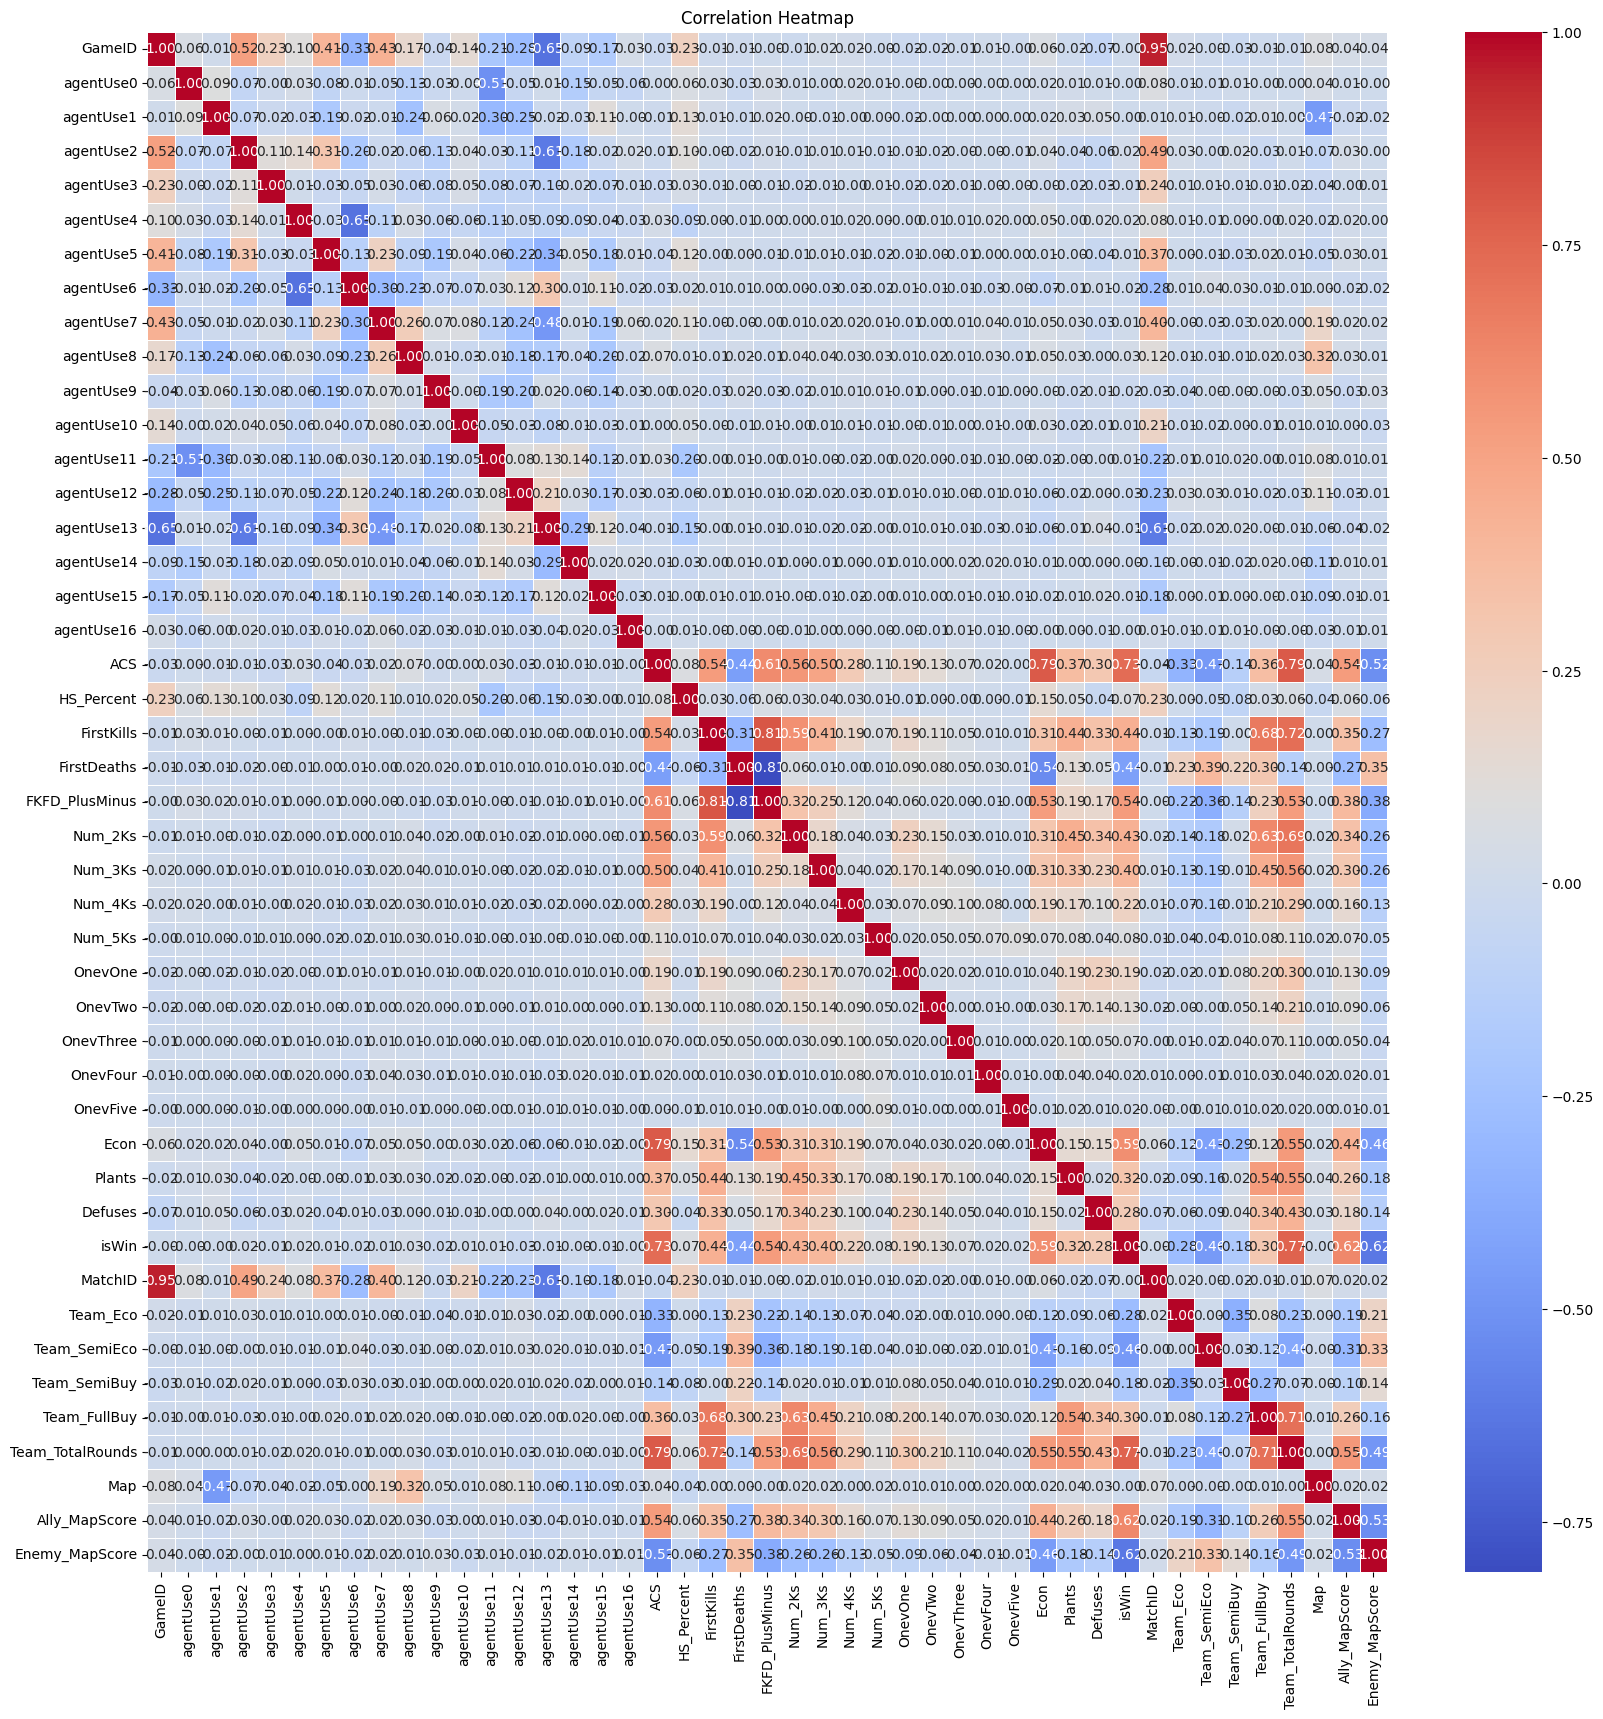

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_scores_by_game_final.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
df_scores_by_game_final = df_scores_by_game_final.drop(['agentUse{}'.format(i) for i in range(NUMBER_OF_AGENTS)], axis=1)

In [44]:
print('Maksimal Outlier: ' + str(2670 / len(df_scores_by_game_final)))

Maksimal Outlier: 0.12332563510392609


# Pengecekan Outlier

In [45]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers
check_outlier(df_scores_by_game_final)

Outlier pada tiap atribut:
GameID                 0
ACS                  232
HS_Percent           197
FirstKills           430
FirstDeaths          429
FKFD_PlusMinus         2
Num_2Ks               92
Num_3Ks              487
Num_4Ks             1274
Num_5Ks             2103
OnevOne                8
OnevTwo              333
OnevThree           2670
OnevFour             522
OnevFive              58
Econ                 640
Plants                11
Defuses              174
isWin                  0
MatchID              212
Team_Eco             529
Team_SemiEco         969
Team_SemiBuy          77
Team_FullBuy         327
Team_TotalRounds     109
Map                    0
Ally_MapScore          0
Enemy_MapScore         0
dtype: int64


,GameID,ACS,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,...,isWin,MatchID,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Ally_MapScore,Enemy_MapScore
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21645,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Pemisahan Feature dan Label

In [46]:
X = df_scores_by_game_final.drop(['ACS', 'GameID', 'MatchID'], axis=1)
y = df_scores_by_game_final['ACS']

# Standardization

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = X.columns
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols)
X_scaled

,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,...,Defuses,isWin,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Ally_MapScore,Enemy_MapScore
0,-0.114172,1.152606,-1.337676,1.540270e+00,-0.680190,0.930699,1.225038,-0.319022,1.961933,-0.706802,...,-1.330247,1.0,-1.183027,-1.308870,0.319144,0.327503,0.716192,-0.330959,0.905389,-0.253513
1,1.188408,-1.649002,-0.092551,-9.626688e-01,-1.572843,-0.490625,-0.904907,-0.319022,-0.999019,-0.706802,...,-0.685132,-1.0,0.034820,1.296674,0.319144,-2.079028,-2.205926,-0.775784,0.905389,-0.253513
2,1.951989,-0.092553,0.218731,-1.925338e-01,0.658791,-0.490625,0.160066,-0.319022,1.961933,-0.706802,...,1.250211,1.0,-1.183027,0.428160,0.319144,0.060111,0.716192,0.558693,0.905389,-0.253513
3,2.311321,-0.092553,-0.092551,2.022037e-17,-0.680190,-0.016850,-0.904907,-0.319022,-0.999019,-0.706802,...,-0.040018,-1.0,0.034820,0.428160,-1.175225,0.327503,-0.877691,-0.330959,0.905389,-0.253513
4,-0.653171,0.841316,-1.026395,1.155203e+00,0.881954,-0.490625,1.225038,-0.319022,-0.999019,-0.706802,...,-0.040018,1.0,0.034820,-1.308870,-0.178979,0.327503,0.716192,-0.775784,0.905389,-0.253513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21645,-0.743004,-0.715133,0.841294,-9.626688e-01,0.212464,-0.490625,-0.904907,2.787962,-0.012035,0.685325,...,-0.040018,-1.0,1.252667,1.296674,-2.171470,0.594895,-0.612044,-1.220610,-1.412415,-0.253513
21646,-0.922670,-1.026422,0.218731,-7.701351e-01,-1.126517,-1.438175,-0.904907,-0.319022,-0.999019,0.685325,...,-0.685132,-1.0,0.034820,-0.440355,-0.178979,-0.474674,-1.408985,0.558693,-1.412415,-0.253513
21647,0.245160,-1.026422,0.841294,-1.155203e+00,0.212464,-0.490625,-0.904907,-0.319022,-0.012035,-0.706802,...,-0.685132,-1.0,0.034820,-0.440355,0.319144,-0.207282,-0.877691,0.558693,-1.412415,-0.253513
21648,-0.608254,-0.092553,-0.715113,3.850675e-01,-0.903353,-0.016850,0.160066,-0.319022,-0.999019,0.685325,...,-0.040018,-1.0,1.252667,-0.440355,-0.178979,-0.742066,-1.408985,1.448344,-1.412415,-0.253513


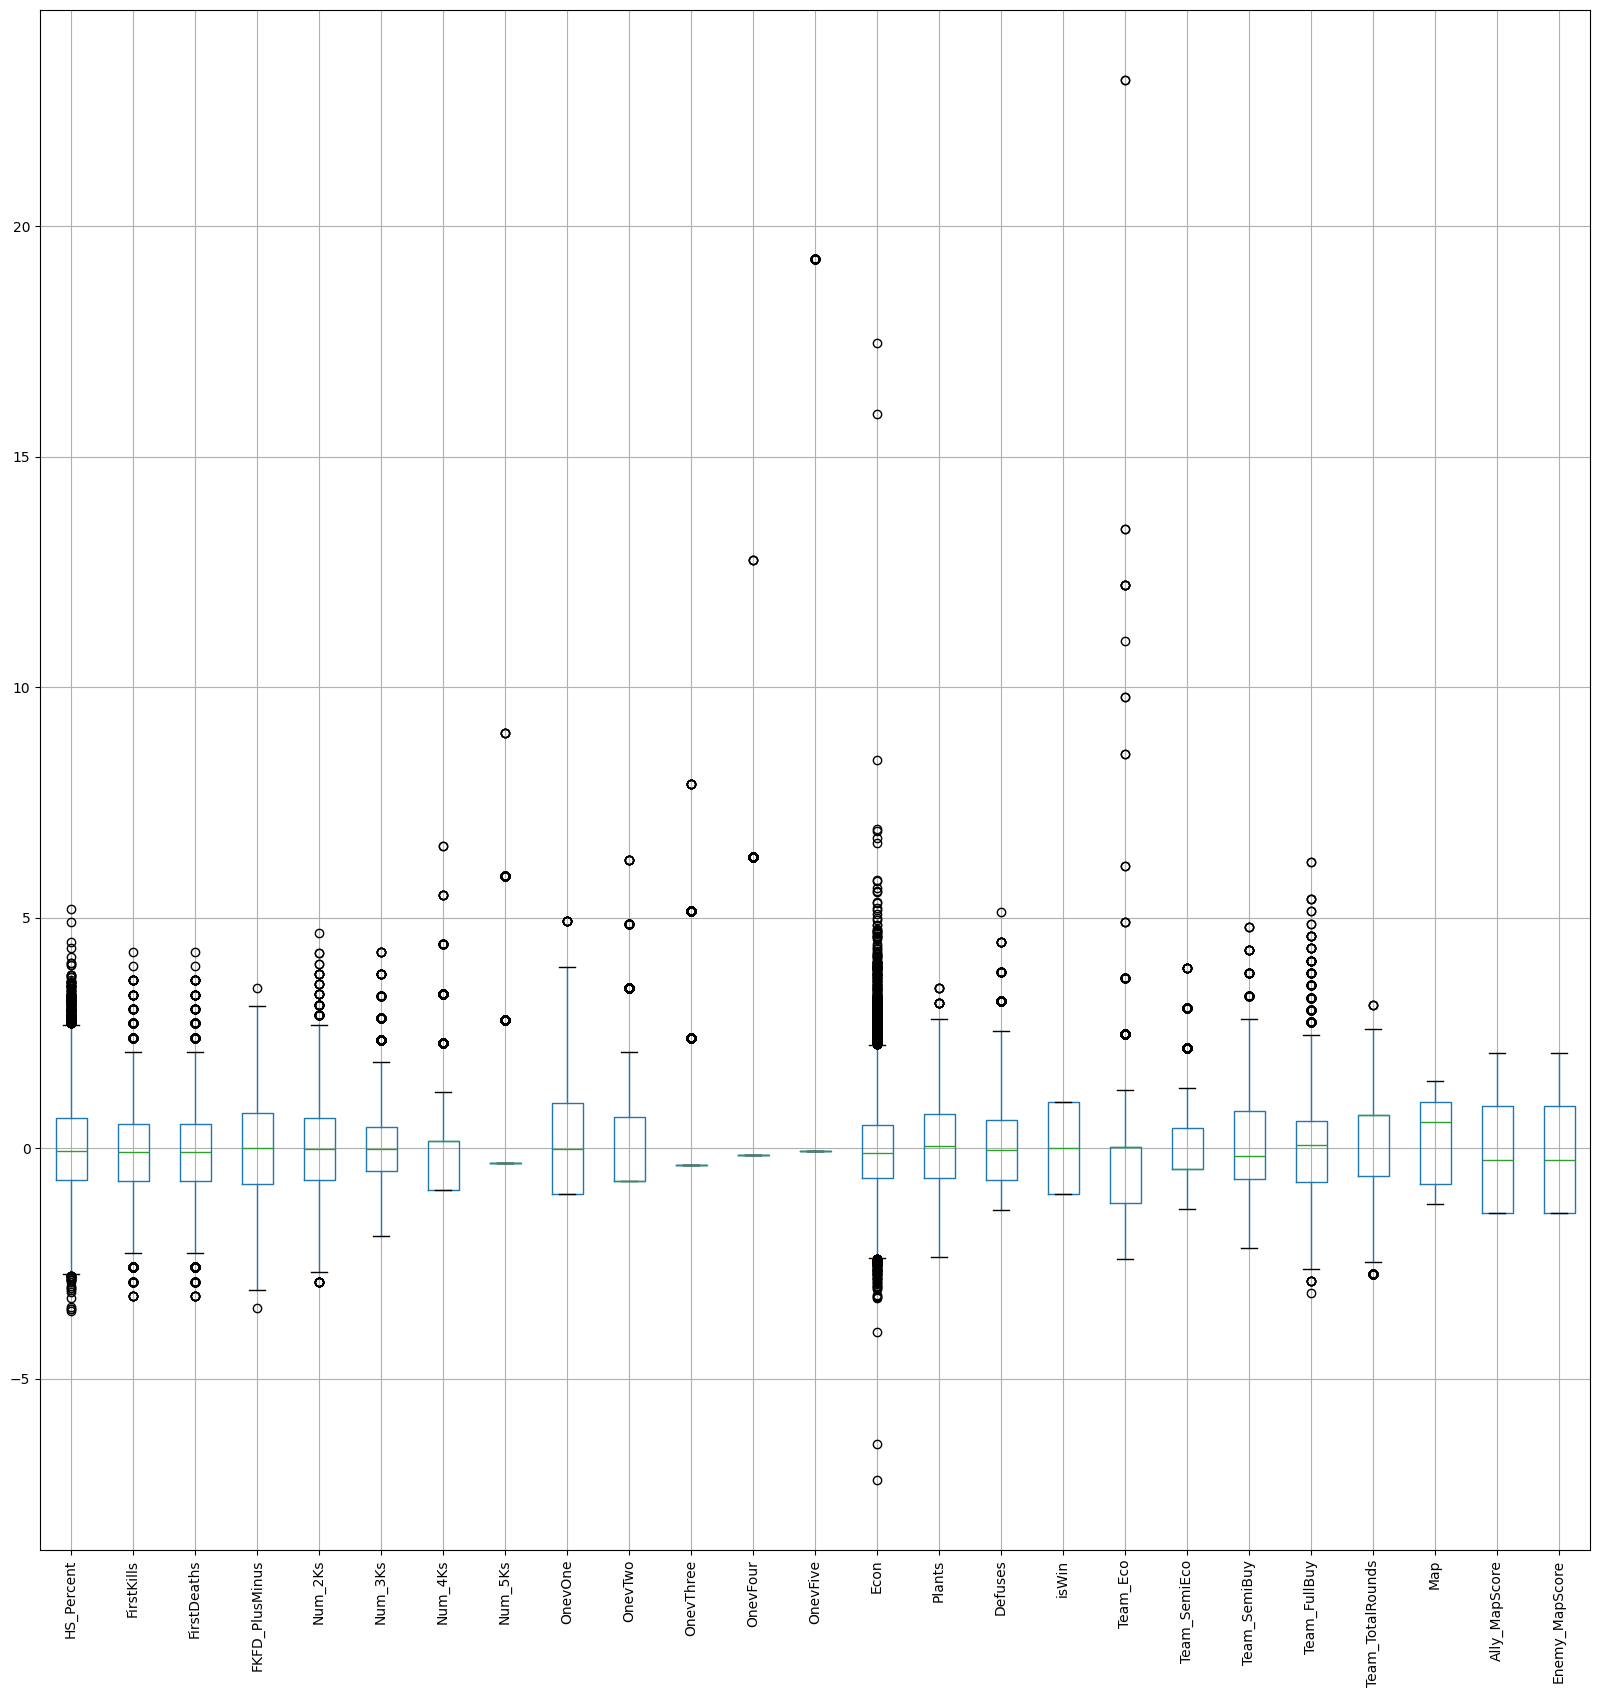

In [48]:
plt.figure(figsize=(20,20))
X_scaled.boxplot(rot=90)
plt.show()

## Feature Selection dengan Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [50]:
lasso.coef_

array([-0.60425399,  0.        , -0.        ,  2.37592618,  8.85765389,
        6.54009886,  3.759844  ,  1.44232058,  0.75203873,  0.30310924,
        0.18224634, -0.        , -0.        ,  8.80927234,  1.03457351,
        0.87432603, -1.94888733, -4.71558138, -3.77007099, -5.02723428,
       -8.64950782,  8.12413284,  0.54846407,  0.45075659, -0.        ])

In [51]:
is_chosen = lasso.coef_ != 0
is_chosen

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [52]:
features = X.columns
chosen_features = []
for i in range(len(features)):
    if is_chosen[i]:
        chosen_features.append(features[i])
chosen_features

['HS_Percent',
 'FKFD_PlusMinus',
 'Num_2Ks',
 'Num_3Ks',
 'Num_4Ks',
 'Num_5Ks',
 'OnevOne',
 'OnevTwo',
 'OnevThree',
 'Econ',
 'Plants',
 'Defuses',
 'isWin',
 'Team_Eco',
 'Team_SemiEco',
 'Team_SemiBuy',
 'Team_FullBuy',
 'Team_TotalRounds',
 'Map',
 'Ally_MapScore']

In [53]:
X_selected = X_scaled[chosen_features]
X_selected

,HS_Percent,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,Econ,Plants,Defuses,isWin,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Ally_MapScore
0,-0.114172,1.540270e+00,-0.680190,0.930699,1.225038,-0.319022,1.961933,-0.706802,-0.362756,-0.008467,-0.635877,-1.330247,1.0,-1.183027,-1.308870,0.319144,0.327503,0.716192,-0.330959,0.905389
1,1.188408,-9.626688e-01,-1.572843,-0.490625,-0.904907,-0.319022,-0.999019,-0.706802,-0.362756,-1.192822,-2.352301,-0.685132,-1.0,0.034820,1.296674,0.319144,-2.079028,-2.205926,-0.775784,0.905389
2,1.951989,-1.925338e-01,0.658791,-0.490625,0.160066,-0.319022,1.961933,-0.706802,2.390021,0.413083,1.080546,1.250211,1.0,-1.183027,0.428160,0.319144,0.060111,0.716192,0.558693,0.905389
3,2.311321,2.022037e-17,-0.680190,-0.016850,-0.904907,-0.319022,-0.999019,-0.706802,2.390021,-0.289501,-0.979162,-0.040018,-1.0,0.034820,0.428160,-1.175225,0.327503,-0.877691,-0.330959,0.905389
4,-0.653171,1.155203e+00,0.881954,-0.490625,1.225038,-0.319022,-0.999019,-0.706802,-0.362756,0.393009,0.737261,-0.040018,1.0,0.034820,-1.308870,-0.178979,0.327503,0.716192,-0.775784,0.905389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21645,-0.743004,-9.626688e-01,0.212464,-0.490625,-0.904907,2.787962,-0.012035,0.685325,-0.362756,-0.108836,-0.635877,-0.040018,-1.0,1.252667,1.296674,-2.171470,0.594895,-0.612044,-1.220610,-1.412415
21646,-0.922670,-7.701351e-01,-1.126517,-1.438175,-0.904907,-0.319022,-0.999019,0.685325,-0.362756,-1.433708,-0.292593,-0.685132,-1.0,0.034820,-0.440355,-0.178979,-0.474674,-1.408985,0.558693,-1.412415
21647,0.245160,-1.155203e+00,0.212464,-0.490625,-0.904907,-0.319022,-0.012035,-0.706802,-0.362756,-0.590608,-0.635877,-0.685132,-1.0,0.034820,-0.440355,0.319144,-0.207282,-0.877691,0.558693,-1.412415
21648,-0.608254,3.850675e-01,-0.903353,-0.016850,0.160066,-0.319022,-0.999019,0.685325,-0.362756,0.172197,-1.322447,-0.040018,-1.0,1.252667,-0.440355,-0.178979,-0.742066,-1.408985,1.448344,-1.412415


# Train-Test Splitting

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = linear_reg.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [58]:
regression_metrics(y_pred, y_test)

MAE: 6.862057808870936
MSE: 84.8481309025465
RMSE: 9.211304516872
R_squared: 0.8933253360235072


In [59]:
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.89448587, 0.90494207, 0.90293668, 0.89472506, 0.87315085])

# Ridge Regression Model

In [60]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [61]:
y_pred = ridge_reg.predict(X_test)

In [62]:
regression_metrics(y_pred, y_test)

MAE: 6.862046797764005
MSE: 84.84770016528275
RMSE: 9.211281135937755
R_squared: 0.8933258775646393


In [63]:
r2_scores = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.8944864 , 0.90494228, 0.90293721, 0.89472625, 0.87314896])

## Pencarian `alpha` Terbaik

In [64]:
alpha_list = [0.01, 0.1, 1, 4, 7, 10, 15, 20, 50, 70, 100, 110, 113, 115, 120, 125]

In [65]:
ridges = []
for alpha in alpha_list:
    cur_ridge = Ridge(alpha=alpha)
    cur_ridge.fit(X_train, y_train)
    ridges.append(cur_ridge)

In [66]:
for ridge in ridges:
    cur_y_pred = ridge.predict(X_test)
    regression_metrics(cur_y_pred, y_test)
    print('='*32)

MAE: 6.8620567076609955
MSE: 84.84808780526609
RMSE: 9.211302177502706
R_squared: 0.8933253902072334
MAE: 6.862046797764005
MSE: 84.84770016528275
RMSE: 9.211281135937755
R_squared: 0.8933258775646393
MAE: 6.86194904720038
MSE: 84.84384703389412
RMSE: 9.211071980713978
R_squared: 0.8933307218846234
MAE: 6.861631962063492
MSE: 84.83130619660403
RMSE: 9.210391207576583
R_squared: 0.893346488756441
MAE: 6.861326983726402
MSE: 84.81922455655766
RMSE: 9.209735314142184
R_squared: 0.8933616783060341
MAE: 6.861041548639798
MSE: 84.80759333948912
RMSE: 9.209103829335898
R_squared: 0.8933763015647815
MAE: 6.860638856959708
MSE: 84.78918571149708
RMSE: 9.208104349511743
R_squared: 0.8933994444143619
MAE: 6.86027804289356
MSE: 84.77196698952251
RMSE: 9.20716932555943
R_squared: 0.8934210925209402
MAE: 6.85883602513189
MSE: 84.69163620552744
RMSE: 9.202805887637066
R_squared: 0.893522087785049
MAE: 6.858547483786095
MSE: 84.65763824155978
RMSE: 9.20095855014899
R_squared: 0.8935648314653583
MAE: 6

In [67]:
best_ridge = ridges[-3]

In [68]:
r2_scores = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.8946421 , 0.90477085, 0.90305163, 0.8953282 , 0.87104322])

# Lasso Regression Model

In [69]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [70]:
y_pred = lasso_reg.predict(X_test)

In [71]:
regression_metrics(y_pred, y_test)

MAE: 6.87125824938441
MSE: 85.03980472429741
RMSE: 9.221702918891793
R_squared: 0.8930843555763144


In [72]:
r2_scores = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.89432503, 0.90426717, 0.90295428, 0.89361525, 0.86832898])

## Pencarian `alpha` Terbaik

In [73]:
alpha_list = [0.01, 0.1, 1, 4, 7]

In [74]:
lassos = []
for alpha in alpha_list:
    cur_lasso = Lasso(alpha=alpha)
    cur_lasso.fit(X_train, y_train)
    lassos.append(cur_lasso)

In [75]:
for lasso in lassos:
    cur_y_pred = lasso.predict(X_test)
    regression_metrics(cur_y_pred, y_test)
    print('='*32)

MAE: 6.859215620013394
MSE: 84.78096377804202
RMSE: 9.20765788776071
R_squared: 0.8934097813773478
MAE: 6.87125824938441
MSE: 85.03980472429741
RMSE: 9.221702918891793
R_squared: 0.8930843555763144
MAE: 7.782079879283486
MSE: 108.69618682812691
RMSE: 10.425746343937536
R_squared: 0.8633425500116877
MAE: 9.445201433640502
MSE: 163.90927463024536
RMSE: 12.80270575426325
R_squared: 0.7939263174353869
MAE: 11.043654901609651
MSE: 220.13082226908082
RMSE: 14.836806336576643
R_squared: 0.7232422064382976


In [76]:
best_lasso = lassos[0]

In [77]:
r2_scores = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.89457991, 0.90498676, 0.90305012, 0.89472195, 0.87278221])

# Random Forest Regression

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
y_pred = forest_reg.predict(X_test)

In [80]:
regression_metrics(y_pred, y_test)

MAE: 6.630925635103925
MSE: 77.08782640554271
RMSE: 8.779967335106818
R_squared: 0.9030819195306201


In [81]:
r2_scores = cross_val_score(forest_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.90205535, 0.90416712, 0.90026365, 0.88464871, 0.90248506])

# Neural Network

In [82]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(
    alpha=1e-5,
    hidden_layer_sizes=(100,),
    solver='adam',
    random_state=42
)

mlp_reg.fit(X_train, y_train)

d:\Projects\tk-kasdad\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=1e-05, random_state=42)

In [83]:
y_pred = mlp_reg.predict(X_test)

In [84]:
regression_metrics(y_pred, y_test)

MAE: 6.104463337853926
MSE: 63.852451341669116
RMSE: 7.99077288762915
R_squared: 0.9197219936550955


In [314]:
r2_scores = cross_val_score(mlp_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

array([0.91391165, 0.91287426, 0.91593741, 0.92054425, 0.90644724])

## Hyperparameter Tuning on MLP Regressor

In [316]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [[100], [100, 160], [110, 50]],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'alpha': [1e-5, 1e-3],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

mlp_reg_tuning = MLPRegressor(random_state=42)
mlp_reg_search = GridSearchCV(mlp_reg_tuning, param_grid, n_jobs=-1, cv=5, scoring='r2')
mlp_reg_search.fit(X_train, y_train)

d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'alpha': [1e-05, 0.001],
                         'hidden_layer_sizes': [[100], [100, 160], [110, 50]],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='r2')

In [317]:
mlp_reg_search.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': [100],
 'learning_rate': 'constant'}

Setelah melakukan tuning, didapat bahwa hyperparameter terbaik adalah `{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': [100], 'learning_rate': 'constant'}`.

In [85]:
mlp_reg_tuned = MLPRegressor(
    alpha=0.001,
    activation='tanh',
    hidden_layer_sizes=[100],
    learning_rate='constant',
    random_state=42
)

mlp_reg_tuned.fit(X_train, y_train)

d:\Projects\tk-kasdad\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=[100],
             random_state=42)

In [86]:
y_pred = mlp_reg_tuned.predict(X_test)

In [87]:
regression_metrics(y_pred, y_test)

MAE: 5.982645920777098
MSE: 60.5246074134032
RMSE: 7.779756256683316
R_squared: 0.9239058999950208


In [91]:
r2_scores = cross_val_score(mlp_reg_tuned, X_train, y_train, cv=5, scoring='r2')
r2_scores

d:\Projects\tk-kasdad\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Projects\tk-kasdad\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Projects\tk-kasdad\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Projects\tk-kasdad\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Projects\tk-kasdad\venv\Lib\site-packages\sklearn\neural_netw

array([0.91799415, 0.92739537, 0.92117257, 0.92499411, 0.92366563])

# Pemilihan Model

Kita lihat statistiknya:

In [93]:
def regression_metrics_list(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)
    return MAE, MSE, RMSE, R_squared

In [94]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)
y_pred_rforest = forest_reg.predict(X_test)
y_pred_mlp = mlp_reg.predict(X_test)
y_pred_mlp_tuned = mlp_reg_tuned.predict(X_test)

In [104]:
model_metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
model_metrics.loc[len(model_metrics.index)] = ['Linear Regression'] + list(regression_metrics_list(y_pred_linear, y_test))
model_metrics.loc[len(model_metrics.index)] = ['Lasso Regression'] + list(regression_metrics_list(y_pred_lasso, y_test))
model_metrics.loc[len(model_metrics.index)] = ['Ridge Regression'] + list(regression_metrics_list(y_pred_ridge, y_test))
model_metrics.loc[len(model_metrics.index)] = ['Random Forest'] + list(regression_metrics_list(y_pred_rforest, y_test))
model_metrics.loc[len(model_metrics.index)] = ['MLP (NN)'] + list(regression_metrics_list(y_pred_mlp, y_test))
model_metrics.set_index('Model', inplace=True)
model_metrics

,MAE,MSE,RMSE,R2
Model,,,,
Linear Regression,6.862058,84.848131,9.211305,0.893325
Lasso Regression,6.859216,84.780964,9.207658,0.893410
Ridge Regression,6.859248,84.628469,9.199373,0.893602
Random Forest,6.630926,77.087826,8.779967,0.903082
MLP (NN),6.104463,63.852451,7.990773,0.919722


In [105]:
model_metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
model_metrics.loc[len(model_metrics.index)] = ['Linear Regression'] + list(regression_metrics_list(y_pred_linear, y_test))
model_metrics.loc[len(model_metrics.index)] = ['Lasso Regression'] + list(regression_metrics_list(y_pred_lasso, y_test))
model_metrics.loc[len(model_metrics.index)] = ['Ridge Regression'] + list(regression_metrics_list(y_pred_ridge, y_test))
model_metrics.loc[len(model_metrics.index)] = ['Random Forest'] + list(regression_metrics_list(y_pred_rforest, y_test))
model_metrics.loc[len(model_metrics.index)] = ['MLP (NN)'] + list(regression_metrics_list(y_pred_mlp, y_test))
model_metrics.loc[len(model_metrics.index)] = ['MLP Hyperparameter Tuned'] + list(regression_metrics_list(y_pred_mlp_tuned, y_test))
model_metrics.set_index('Model', inplace=True)
model_metrics

,MAE,MSE,RMSE,R2
Model,,,,
Linear Regression,6.862058,84.848131,9.211305,0.893325
Lasso Regression,6.859216,84.780964,9.207658,0.893410
Ridge Regression,6.859248,84.628469,9.199373,0.893602
Random Forest,6.630926,77.087826,8.779967,0.903082
MLP (NN),6.104463,63.852451,7.990773,0.919722
MLP Hyperparameter Tuned,5.982646,60.524607,7.779756,0.923906


Karena dari semua model yang paling bagus berdasarkan R-squared pada cross validation adalah MLP Regressor hasil tuning, maka kita pilih model tersebut.

In [326]:
regression_model = mlp_reg_tuned

# Kaggle Dataset

In [327]:
df_games = pd.read_csv('../dataset_test/games_test.csv')
df_scores = pd.read_csv('../dataset_test/scores_test.csv')
df_matches = pd.read_csv('../dataset_test/matches_test.csv')

In [328]:
df_scores

,No,GameID,PlayerID,PlayerName,TeamAbbreviation,Kills,Deaths,Assists,PlusMinus,KAST_Percent,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,100,60918,6416.0,jcrueL,Salt and Vinegar,16.0,16.0,7.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1.0,0.0
1,101,60918,3980.0,Governor,Salt and Vinegar,14.0,16.0,9.0,-2.0,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,3.0,0.0
2,102,60918,1129.0,Rossy,Salt and Vinegar,18.0,12.0,10.0,6.0,0.75,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,63.0,4.0,0.0
3,103,60918,3880.0,bang,Salt and Vinegar,15.0,13.0,10.0,2.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0,1.0
4,104,60918,733.0,stellar,Salt and Vinegar,14.0,13.0,3.0,1.0,0.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29155,146715,2298,1359.0,HulkzteN,clowns,9.0,16.0,1.0,-7.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,1.0,0.0
29156,146716,2298,1360.0,m6mzel,clowns,10.0,16.0,2.0,-6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0
29157,146717,2298,1358.0,tul1p,clowns,9.0,14.0,3.0,-5.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0
29158,146718,2298,1362.0,toffij,clowns,8.0,12.0,6.0,-4.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,3.0,0.0


In [329]:
df_scores_team = [
    df_scores[df_scores.index % 10 < 5],
    df_scores[df_scores.index % 10 >= 5]
]
df_scores_team[0]

,No,GameID,PlayerID,PlayerName,TeamAbbreviation,Kills,Deaths,Assists,PlusMinus,KAST_Percent,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,100,60918,6416.0,jcrueL,Salt and Vinegar,16.0,16.0,7.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1.0,0.0
1,101,60918,3980.0,Governor,Salt and Vinegar,14.0,16.0,9.0,-2.0,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,3.0,0.0
2,102,60918,1129.0,Rossy,Salt and Vinegar,18.0,12.0,10.0,6.0,0.75,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,63.0,4.0,0.0
3,103,60918,3880.0,bang,Salt and Vinegar,15.0,13.0,10.0,2.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0,1.0
4,104,60918,733.0,stellar,Salt and Vinegar,14.0,13.0,3.0,1.0,0.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29150,146710,2298,2085.0,GillianH,GoodVibes,24.0,7.0,0.0,17.0,NaN,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,2.0,1.0
29151,146711,2298,2088.0,fxy0,GoodVibes,17.0,9.0,3.0,8.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0
29152,146712,2298,2086.0,maouu,GoodVibes,13.0,12.0,4.0,1.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,1.0,0.0
29153,146713,2298,116.0,PetitSkel,GoodVibes,14.0,7.0,5.0,7.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0


In [330]:
df_scores_by_game = [
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1), 
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1), 
]
df_scores_by_game[0]

,GameID
0,60918
1,60919
2,60900
3,60901
4,60902
...,...
2911,2444
2912,2445
2913,2446
2914,2306


In [331]:
avg_columns.remove('ACS')

In [332]:
df_avg_scores = [
    df_scores_team[0][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
    df_scores_team[1][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
]
df_avg_scores[0]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,2298,20.8,2.8,0.6,2.2,3.4,0.6,0.4,0.0,0.2,0.0,0.0,0.0,0.0,72.2,0.8,0.2
1,2306,25.4,2.6,1.4,1.2,4.0,0.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,60.6,1.4,0.6
2,2444,21.0,1.2,2.4,-1.2,1.2,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,45.2,0.6,0.2
3,2445,16.2,2.0,2.6,-0.6,3.6,0.8,0.0,0.0,0.6,0.2,0.0,0.0,0.0,47.8,1.2,0.8
4,2446,18.8,2.6,1.2,1.4,3.2,0.8,0.0,0.0,0.4,0.0,0.0,0.0,0.0,61.4,1.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,60902,24.4,3.2,0.6,2.6,3.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,69.4,1.2,0.4
2912,60915,23.4,2.2,1.0,1.2,3.4,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.4,0.6,1.0
2913,60916,35.4,2.0,1.0,1.0,1.6,1.6,0.4,0.0,0.2,0.2,0.0,0.0,0.0,74.0,2.4,0.4
2914,60918,27.2,2.0,2.0,0.0,2.0,1.2,0.0,0.0,0.2,0.2,0.2,0.0,0.0,55.6,2.0,0.4


In [333]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_avg_scores[0], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].merge(df_avg_scores[1], left_on='GameID', right_on='GameID')
df_scores_by_game[0]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60918,27.2,2.0,2.0,0.0,2.0,1.2,0.0,0.0,0.2,0.2,0.2,0.0,0.0,55.6,2.0,0.4
1,60919,31.6,2.8,2.4,0.4,2.4,0.8,0.4,0.0,0.4,0.4,0.0,0.0,0.0,49.6,2.6,0.4
2,60900,29.4,1.0,2.6,-1.6,2.4,0.4,0.2,0.0,0.0,0.2,0.0,0.0,0.0,49.0,1.6,0.2
3,60901,31.6,1.6,1.8,-0.2,2.4,0.4,0.4,0.0,0.2,0.0,0.0,0.0,0.0,59.8,1.8,0.2
4,60902,24.4,3.2,0.6,2.6,3.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,69.4,1.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2444,21.0,1.2,2.4,-1.2,1.2,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,45.2,0.6,0.2
2912,2445,16.2,2.0,2.6,-0.6,3.6,0.8,0.0,0.0,0.6,0.2,0.0,0.0,0.0,47.8,1.2,0.8
2913,2446,18.8,2.6,1.2,1.4,3.2,0.8,0.0,0.0,0.4,0.0,0.0,0.0,0.0,61.4,1.0,0.4
2914,2306,25.4,2.6,1.4,1.2,4.0,0.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,60.6,1.4,0.6


In [334]:
df_temp_is_win = df_games[['GameID', 'Winner']]
df_temp_is_win['isTeam1Win'] = (df_temp_is_win['Winner'] == 1).astype(int)
df_temp_is_win['isTeam2Win'] = (df_temp_is_win['Winner'] == 2).astype(int)
df_temp_is_win

C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\4172782635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_is_win['isTeam1Win'] = (df_temp_is_win['Winner'] == 1).astype(int)
C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\4172782635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_is_win['isTeam2Win'] = (df_temp_is_win['Winner'] == 2).astype(int)


,GameID,Winner,isTeam1Win,isTeam2Win
0,60918,1,1,0
1,60919,1,1,0
2,60900,2,0,1
3,60901,1,1,0
4,60902,1,1,0
...,...,...,...,...
2911,2444,2,0,1
2912,2445,1,1,0
2913,2446,1,1,0
2914,2306,1,1,0


In [335]:
df_scores_by_game[0]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60918,27.2,2.0,2.0,0.0,2.0,1.2,0.0,0.0,0.2,0.2,0.2,0.0,0.0,55.6,2.0,0.4
1,60919,31.6,2.8,2.4,0.4,2.4,0.8,0.4,0.0,0.4,0.4,0.0,0.0,0.0,49.6,2.6,0.4
2,60900,29.4,1.0,2.6,-1.6,2.4,0.4,0.2,0.0,0.0,0.2,0.0,0.0,0.0,49.0,1.6,0.2
3,60901,31.6,1.6,1.8,-0.2,2.4,0.4,0.4,0.0,0.2,0.0,0.0,0.0,0.0,59.8,1.8,0.2
4,60902,24.4,3.2,0.6,2.6,3.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,69.4,1.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2444,21.0,1.2,2.4,-1.2,1.2,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,45.2,0.6,0.2
2912,2445,16.2,2.0,2.6,-0.6,3.6,0.8,0.0,0.0,0.6,0.2,0.0,0.0,0.0,47.8,1.2,0.8
2913,2446,18.8,2.6,1.2,1.4,3.2,0.8,0.0,0.0,0.4,0.0,0.0,0.0,0.0,61.4,1.0,0.4
2914,2306,25.4,2.6,1.4,1.2,4.0,0.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,60.6,1.4,0.6


In [336]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp_is_win[['GameID', 'isTeam1Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'isTeam1Win': 'isWin'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp_is_win[['GameID', 'isTeam2Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'isTeam2Win': 'isWin'})

In [337]:
df_scores_by_game[0]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses,isWin
0,60918,27.2,2.0,2.0,0.0,2.0,1.2,0.0,0.0,0.2,0.2,0.2,0.0,0.0,55.6,2.0,0.4,1
1,60919,31.6,2.8,2.4,0.4,2.4,0.8,0.4,0.0,0.4,0.4,0.0,0.0,0.0,49.6,2.6,0.4,1
2,60900,29.4,1.0,2.6,-1.6,2.4,0.4,0.2,0.0,0.0,0.2,0.0,0.0,0.0,49.0,1.6,0.2,0
3,60901,31.6,1.6,1.8,-0.2,2.4,0.4,0.4,0.0,0.2,0.0,0.0,0.0,0.0,59.8,1.8,0.2,1
4,60902,24.4,3.2,0.6,2.6,3.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,69.4,1.2,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2444,21.0,1.2,2.4,-1.2,1.2,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,45.2,0.6,0.2,0
2912,2445,16.2,2.0,2.6,-0.6,3.6,0.8,0.0,0.0,0.6,0.2,0.0,0.0,0.0,47.8,1.2,0.8,1
2913,2446,18.8,2.6,1.2,1.4,3.2,0.8,0.0,0.0,0.4,0.0,0.0,0.0,0.0,61.4,1.0,0.4,1
2914,2306,25.4,2.6,1.4,1.2,4.0,0.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,60.6,1.4,0.6,1


In [338]:
df_team_buy_1 = df_games[['GameID', 'MatchID'] + buy_columns_1]
df_team_buy_2 = df_games[['GameID', 'MatchID'] + buy_columns_2]
df_team_buy_1

,GameID,MatchID,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds
0,60918,62401,3.0,2.0,3.0,12.0,13
1,60919,62401,3.0,2.0,5.0,16.0,14
2,60900,62395,4.0,1.0,5.0,8.0,5
3,60901,62395,2.0,0.0,4.0,11.0,13
4,60902,62395,3.0,1.0,2.0,13.0,13
...,...,...,...,...,...,...,...
2911,2444,1606,5.0,1.0,4.0,9.0,5
2912,2445,1606,3.0,3.0,2.0,15.0,13
2913,2446,1606,4.0,0.0,2.0,13.0,13
2914,2306,1500,2.0,1.0,3.0,14.0,13


In [339]:
df_scores_by_game[0]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses,isWin
0,60918,27.2,2.0,2.0,0.0,2.0,1.2,0.0,0.0,0.2,0.2,0.2,0.0,0.0,55.6,2.0,0.4,1
1,60919,31.6,2.8,2.4,0.4,2.4,0.8,0.4,0.0,0.4,0.4,0.0,0.0,0.0,49.6,2.6,0.4,1
2,60900,29.4,1.0,2.6,-1.6,2.4,0.4,0.2,0.0,0.0,0.2,0.0,0.0,0.0,49.0,1.6,0.2,0
3,60901,31.6,1.6,1.8,-0.2,2.4,0.4,0.4,0.0,0.2,0.0,0.0,0.0,0.0,59.8,1.8,0.2,1
4,60902,24.4,3.2,0.6,2.6,3.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,69.4,1.2,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2444,21.0,1.2,2.4,-1.2,1.2,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,45.2,0.6,0.2,0
2912,2445,16.2,2.0,2.6,-0.6,3.6,0.8,0.0,0.0,0.6,0.2,0.0,0.0,0.0,47.8,1.2,0.8,1
2913,2446,18.8,2.6,1.2,1.4,3.2,0.8,0.0,0.0,0.4,0.0,0.0,0.0,0.0,61.4,1.0,0.4,1
2914,2306,25.4,2.6,1.4,1.2,4.0,0.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,60.6,1.4,0.6,1


In [340]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_team_buy_1, left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns=buy_dict_1)
df_scores_by_game[1] = df_scores_by_game[1].merge(df_team_buy_2, left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns=buy_dict_2)

In [341]:
df_scores_by_game[0]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,...,Econ,Plants,Defuses,isWin,MatchID,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds
0,60918,27.2,2.0,2.0,0.0,2.0,1.2,0.0,0.0,0.2,...,55.6,2.0,0.4,1,62401,3.0,2.0,3.0,12.0,13
1,60919,31.6,2.8,2.4,0.4,2.4,0.8,0.4,0.0,0.4,...,49.6,2.6,0.4,1,62401,3.0,2.0,5.0,16.0,14
2,60900,29.4,1.0,2.6,-1.6,2.4,0.4,0.2,0.0,0.0,...,49.0,1.6,0.2,0,62395,4.0,1.0,5.0,8.0,5
3,60901,31.6,1.6,1.8,-0.2,2.4,0.4,0.4,0.0,0.2,...,59.8,1.8,0.2,1,62395,2.0,0.0,4.0,11.0,13
4,60902,24.4,3.2,0.6,2.6,3.0,1.0,0.0,0.0,0.2,...,69.4,1.2,0.4,1,62395,3.0,1.0,2.0,13.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2444,21.0,1.2,2.4,-1.2,1.2,0.4,0.0,0.0,0.0,...,45.2,0.6,0.2,0,1606,5.0,1.0,4.0,9.0,5
2912,2445,16.2,2.0,2.6,-0.6,3.6,0.8,0.0,0.0,0.6,...,47.8,1.2,0.8,1,1606,3.0,3.0,2.0,15.0,13
2913,2446,18.8,2.6,1.2,1.4,3.2,0.8,0.0,0.0,0.4,...,61.4,1.0,0.4,1,1606,4.0,0.0,2.0,13.0,13
2914,2306,25.4,2.6,1.4,1.2,4.0,0.6,0.6,0.0,0.0,...,60.6,1.4,0.6,1,1500,2.0,1.0,3.0,14.0,13


In [342]:
df_games['MapEncoded'] = map_encoder.transform(df_games['Map'])

In [343]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_games[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'MapEncoded': 'Map'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_games[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'MapEncoded': 'Map'})

In [344]:
df_mapscore = df_matches[['MatchID', 'Team1_MapScore', 'Team2_MapScore']]

In [345]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_mapscore, left_on='MatchID', right_on='MatchID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'Team1_MapScore': 'Ally_MapScore', 'Team2_MapScore': 'Enemy_MapScore'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_mapscore, left_on='MatchID', right_on='MatchID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'Team1_MapScore': 'Enemy_MapScore', 'Team2_MapScore': 'Ally_MapScore'})

In [346]:
df_scores_by_game[0]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,...,isWin,MatchID,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Ally_MapScore,Enemy_MapScore
0,60918,27.2,2.0,2.0,0.0,2.0,1.2,0.0,0.0,0.2,...,1,62401,3.0,2.0,3.0,12.0,13,0,2,0
1,60919,31.6,2.8,2.4,0.4,2.4,0.8,0.4,0.0,0.4,...,1,62401,3.0,2.0,5.0,16.0,14,4,2,0
2,60900,29.4,1.0,2.6,-1.6,2.4,0.4,0.2,0.0,0.0,...,0,62395,4.0,1.0,5.0,8.0,5,5,2,1
3,60901,31.6,1.6,1.8,-0.2,2.4,0.4,0.4,0.0,0.2,...,1,62395,2.0,0.0,4.0,11.0,13,2,2,1
4,60902,24.4,3.2,0.6,2.6,3.0,1.0,0.0,0.0,0.2,...,1,62395,3.0,1.0,2.0,13.0,13,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2444,21.0,1.2,2.4,-1.2,1.2,0.4,0.0,0.0,0.0,...,0,1606,5.0,1.0,4.0,9.0,5,1,2,1
2912,2445,16.2,2.0,2.6,-0.6,3.6,0.8,0.0,0.0,0.6,...,1,1606,3.0,3.0,2.0,15.0,13,6,2,1
2913,2446,18.8,2.6,1.2,1.4,3.2,0.8,0.0,0.0,0.4,...,1,1606,4.0,0.0,2.0,13.0,13,0,2,1
2914,2306,25.4,2.6,1.4,1.2,4.0,0.6,0.6,0.0,0.0,...,1,1500,2.0,1.0,3.0,14.0,13,6,1,0


In [347]:
df_scores_by_game[1]

,GameID,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,Num_2Ks,Num_3Ks,Num_4Ks,Num_5Ks,OnevOne,...,isWin,MatchID,Team_Eco,Team_SemiEco,Team_SemiBuy,Team_FullBuy,Team_TotalRounds,Map,Enemy_MapScore,Ally_MapScore
0,60918,26.0,2.0,2.0,0.0,3.0,0.6,0.0,0.0,0.2,...,0,62401,3.0,3.0,6.0,8.0,7,0,2,0
1,60919,25.0,2.4,2.8,-0.4,3.8,1.4,0.0,0.0,0.2,...,0,62401,2.0,4.0,4.0,16.0,12,4,2,0
2,60900,23.4,2.6,1.0,1.6,3.2,0.6,0.4,0.0,0.4,...,1,62395,2.0,1.0,5.0,10.0,13,5,2,1
3,60901,28.8,1.8,1.6,0.2,1.4,0.6,0.0,0.0,0.0,...,0,62395,4.0,1.0,4.0,8.0,4,2,2,1
4,60902,24.0,0.6,3.2,-2.6,1.8,0.8,0.0,0.0,0.2,...,0,62395,3.0,3.0,6.0,7.0,6,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2444,20.6,2.4,1.2,1.2,1.8,1.0,0.4,0.0,0.0,...,1,1606,3.0,1.0,5.0,10.0,13,1,2,1
2912,2445,17.0,2.6,2.0,0.6,2.8,1.0,0.6,0.0,0.2,...,0,1606,3.0,2.0,2.0,16.0,10,6,2,1
2913,2446,17.2,1.2,2.6,-1.4,2.4,0.4,0.0,0.0,0.2,...,0,1606,3.0,1.0,9.0,6.0,6,0,2,1
2914,2306,16.8,1.4,2.6,-1.2,1.6,0.4,0.2,0.0,0.2,...,0,1500,4.0,2.0,4.0,10.0,7,6,1,0


In [348]:
X_kaggle_team_1 = df_scores_by_game[0]
X_kaggle_team_2 = df_scores_by_game[1]

In [349]:
key_team_1 = X_kaggle_team_1[['GameID', 'MatchID']]
key_team_2 = X_kaggle_team_2[['GameID', 'MatchID']]

In [350]:
team_1_acs = X_kaggle_team_1[['MatchID']]
team_2_acs = X_kaggle_team_2[['MatchID']]

In [351]:
X_kaggle_team_1 = X_kaggle_team_1.drop(['GameID', 'MatchID'], axis=1)
X_kaggle_team_2 = X_kaggle_team_2.drop(['GameID', 'MatchID'], axis=1)

if 'ACS' in X_kaggle_team_1.columns:
    X_kaggle_team_1 = X_kaggle_team_1.drop('ACS', axis=1)
    X_kaggle_team_2 = X_kaggle_team_2.drop('ACS', axis=1)

In [352]:
X_kaggle_team_2 = X_kaggle_team_2.reindex(columns=X_kaggle_team_1.columns)

In [353]:
X_kaggle_team_1_scaled = scaler.transform(X_kaggle_team_1)
X_kaggle_team_1_scaled = pd.DataFrame(X_kaggle_team_1_scaled, columns=cols)
X_kaggle_team_2_scaled = scaler.transform(X_kaggle_team_2)
X_kaggle_team_2_scaled = pd.DataFrame(X_kaggle_team_2_scaled, columns=cols)

## Prediction

In [354]:
y_pred_team_1 = regression_model.predict(X_kaggle_team_1_scaled.drop(['Enemy_MapScore', 'FirstDeaths', 'FirstKills', 'OnevFive', 'OnevFour'], axis=1))
y_pred_team_2 = regression_model.predict(X_kaggle_team_2_scaled.drop(['Enemy_MapScore', 'FirstDeaths', 'FirstKills', 'OnevFive', 'OnevFour'], axis=1))

In [355]:
y_pred_team_1

array([209.9973218 , 200.95583666, 187.10249886, ..., 221.76985681,
       236.2852488 , 243.14937546])

In [356]:
y_pred_team_2

array([197.60439191, 211.62636892, 234.95940889, ..., 181.16108854,
       169.83860286, 152.5132771 ])

In [357]:
team_1_acs['ACS'] = y_pred_team_1
team_2_acs['ACS'] = y_pred_team_2

C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\1700731442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1_acs['ACS'] = y_pred_team_1
C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\1700731442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2_acs['ACS'] = y_pred_team_2


In [358]:
team_1_acs

,MatchID,ACS
0,62401,209.997322
1,62401,200.955837
2,62395,187.102499
3,62395,220.796170
4,62395,229.706820
...,...,...
2911,1606,155.488047
2912,1606,201.989945
2913,1606,221.769857
2914,1500,236.285249


## Average ACS on Matches

In [359]:
team_1_acs = team_1_acs.groupby('MatchID').mean().reset_index()
team_2_acs = team_2_acs.groupby('MatchID').mean().reset_index()

In [360]:
team_1_acs = team_1_acs.rename(columns={'ACS': 'Team1_MeanACS'})
team_2_acs = team_2_acs.rename(columns={'ACS': 'Team2_MeanACS'})

In [361]:
team_acs = team_1_acs.merge(team_2_acs, left_on='MatchID', right_on='MatchID')

In [362]:
team_acs

,MatchID,Team1_MeanACS,Team2_MeanACS
0,1491,243.149375,152.513277
1,1500,236.285249,169.838603
2,1606,193.082616,207.255839
3,1727,185.325595,214.480505
4,1739,166.864539,231.140882
...,...,...,...
1412,61946,195.455801,193.383642
1413,62072,219.179827,195.087250
1414,62395,212.535163,191.659745
1415,62400,249.112199,158.132902


In [363]:
df_no_match = df_matches[['No', 'MatchID']]
df_no_match

,No,MatchID
0,752,48204
1,2760,22936
2,1337,42347
3,3821,16220
4,1570,34733
...,...,...
1412,848,48936
1413,1183,43845
1414,6001,5779
1415,4385,12211


In [364]:
df_result = df_no_match.merge(team_acs, left_on='MatchID', right_on='MatchID')
df_result = df_result.drop('MatchID', axis=1)

In [365]:
df_result

,No,Team1_MeanACS,Team2_MeanACS
0,752,232.572109,165.668312
1,2760,241.426977,149.183316
2,1337,224.846651,203.690229
3,3821,235.240929,166.964505
4,1570,219.038773,191.339973
...,...,...,...
1412,848,218.966523,192.811625
1413,1183,215.783059,194.591073
1414,6001,226.867859,179.887543
1415,4385,227.492409,168.897811


In [366]:
df_result.to_csv('../predictions/match_acs.csv', index=False)